# Communicate Data Finding Slide Deck with Ford GoBike Data
## by Jiarun He

## Investigation Overview

> What are the features affecting trip distance, what's the relationship between trip distance and features like weather , user type.

## Dataset Overview

> This data set includes information about rides made in a bike-sharing system covering the greater San Francisco Bay area..

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_copy=pd.read_csv('final_df.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Q1. What's the average trip distance?

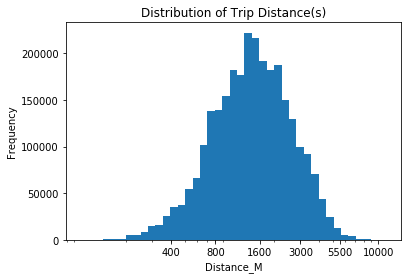

In [9]:
df_copy['distance_m'] = df_copy['distance_km'] * 1000
bin_edges = 10**np.arange(2 , 4+0.1 , 0.05)
ticks =  [400,800,1600,3000,5500,10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'distance_m' , bins = bin_edges);
#plt.xticks(ticks,labels);
plt.xlabel('Distance_M');
plt.xscale('log');
plt.title('Distribution of Trip Distance(s)')
plt.ylabel('Frequency')
plt.xticks(ticks,labels)
plt.show()

Conclusion 1 : We can see by the plot above, most of bike users ride bikes for a short distance around 1.6 KM.


## (Visualization 2)

> Q2. Does trip distance depend on user group (subscriber vs. customer)?

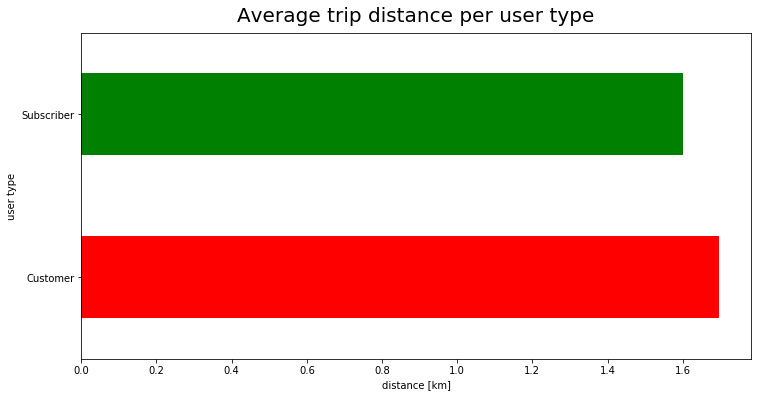

In [10]:
ax = df_copy.groupby('user_type')['distance_km'].mean().plot(kind='barh', color=['red', 'green'], figsize=(12,6))
ax.set_title('Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type')
ax.set_xlabel('distance [km]')
plt.show()

Conclusion 2: We can see that on average customers travel 1.7 km, and subscribers travel 1.6 km on average.

## (Visualization 3)
> Q3. How does seasonality (weather condition) affect the trip distance of each user group?


In [12]:
df_copy_2018 = df_copy[df_copy['year']==2018]

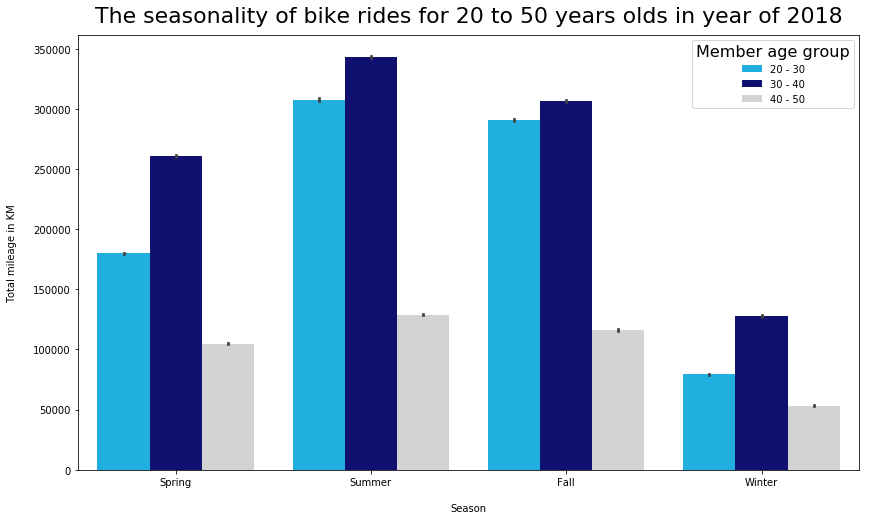

In [13]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'lightgrey'}
ax = sb.barplot(x='season', y='distance_km', estimator=sum, hue='member_age_bins', palette=my_palette, data=df_copy_2018[df_copy_2018['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['season_num', 'member_age_bins']))
plt.title('The seasonality of bike rides for 20 to 50 years olds in year of 2018', fontsize=22, y=1.015)
plt.xlabel('Season', labelpad=16)
plt.ylabel('Total mileage in KM', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
#ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

Conclusion 3: Poeple in age 30-40 consume more than twice of the bike service mileage than people in age group 40-50 in all four seasons. Summer is the most popular season of the year across all age groups.

It's interesting to see people prefer fall weather than spring (more total mileage in fall than spring), I think it's due to the fact that there are more raining days in spring in general than fall [1].

[1] "First month of spring is rainy with average temperature about 13 °C (55 °F)." reference:https://seasonsyear.com/USA/San-Francisco

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!